In [1]:
# For reading in tif files:

import numpy as np
from PIL import Image, ImageDraw

# For plotting visualization(s):

import rasterio
import geopandas
from matplotlib import pyplot as plt
import contextily as cx
from shapely.geometry import Point
from osgeo import gdal

/Users/rdhillon/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Opens TIFF files

veg_dist_status = Image.open('VEG_DIST_STATUS.tif')
dist_status = np.array(veg_dist_status)

veg_anom_max = Image.open('VEG_ANOM_MAX.tif')
anom_max = np.array(veg_anom_max)

veg_dist_date = Image.open('VEG_DIST_DATE.tif')
dist_date = np.array(veg_dist_date)

In [3]:
def remove_zero_vals(M, N, array):
    for i in range(M):
        for j in range(N):
            if array[i][j] < 1:
                array[i][j] = float("NaN")
    return array

In [4]:
# Filters out zero values

M, N = dist_status.shape
mask = np.ones(veg_dist_status.size)

dist_status_image = dist_status * mask

# for i in range(M):
#     for j in range(N):
#         if dist_status_image[i][j] < 1:
#             dist_status_image[i][j] = float("NaN")
            
dist_status_image = remove_zero_vals(M, N, dist_status_image)
    
dist_status_image = Image.fromarray(dist_status)
dist_status_image.save('dist_status_image.tif')

In [6]:
# Produces area extent image

mask = np.empty(veg_dist_status.size)
M, N = mask.shape

for i in range(M):
    for j in range(N):
        if anom_max[i][j] > 10 and dist_date[i][j] > 463:
            mask[i][j] = 1
            
extent_image = dist_status * mask

# for i in range(M):
#     for j in range(N):
#         if extent_image[i][j] < 1:
#             extent_image[i][j] = float("NaN")

extent_image = remove_zero_vals(M, N, extent_image)

extent_image = Image.fromarray(extent_image)
extent_image.save('extent_image.tif')

In [7]:
# Filters by maximum vegetation loss

mask = np.empty(veg_anom_max.size)
M, N = mask.shape

for i in range(M):
    for j in range(N):
        if anom_max[i][j] > 10:
            mask[i][j] = 1.0
            
anom_max_image = dist_status * mask

# for i in range(M):
#     for j in range(N):
#         if anom_max_image[i][j] < 1:
#             anom_max_image[i][j] = float("NaN")

anom_max_image = remove_zero_vals(M, N, anom_max_image)

anom_max_image = Image.fromarray(anom_max_image)
anom_max_image.save('anom_max_image.tif')       

In [8]:
# Filters by date

mask = np.empty(veg_dist_date.size)
M, N = mask.shape

for i in range(M):
    for j in range(N):
        if dist_date[i][j] > 463:
            mask[i][j] = 1.0

dist_date_image = dist_status * mask

# for i in range(M):
#     for j in range(N):
#         if dist_date_image[i][j] < 1:
#             dist_date_image[i][j] = float("NaN")

dist_date_image = remove_zero_vals(M, N, dist_date_image)

dist_date_image = Image.fromarray(dist_date_image)
dist_date_image.save('dist_date_image.tif')

/Users/rdhillon/opt/anaconda3/lib/python3.9/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


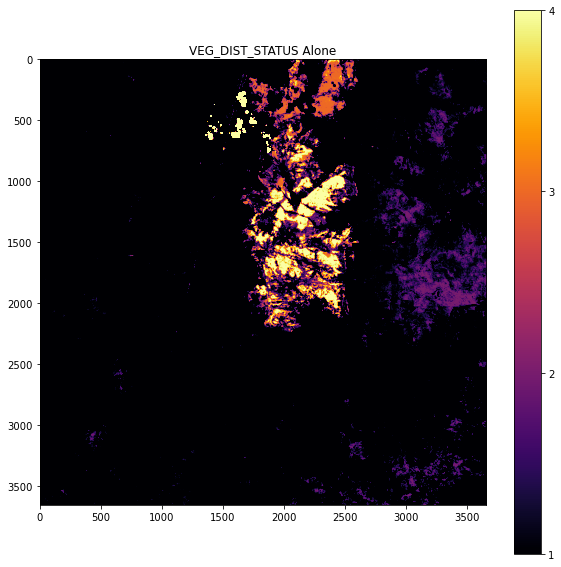

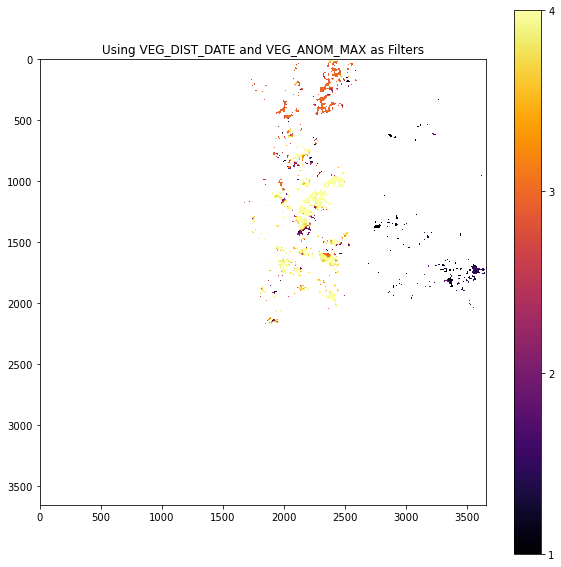

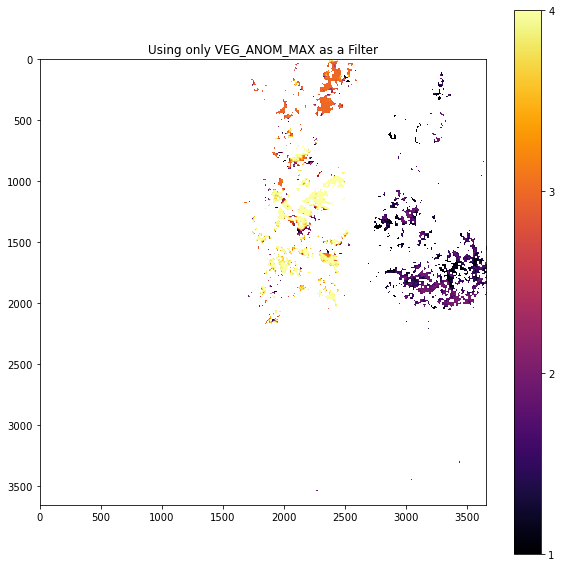

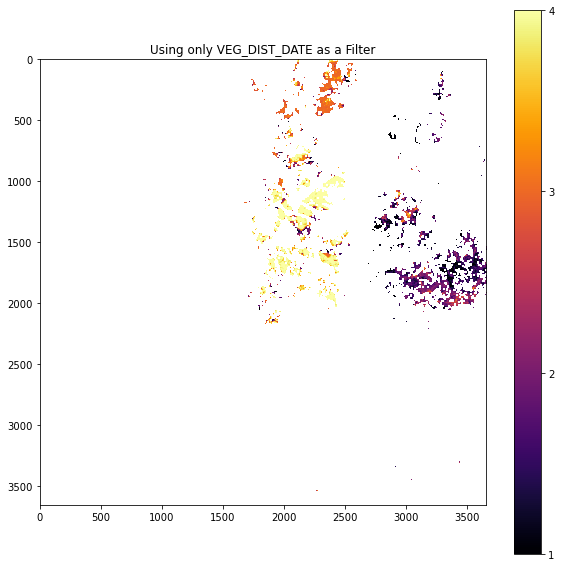

In [9]:
# Plots visualizations so far

src = rasterio.open('dist_status_image.tif')
fig = plt.figure(figsize=(10,10))
ax2 = plt.imshow(src.read(1), cmap='inferno')
plt.colorbar(orientation='vertical', ticks=range(5))
plt.title('VEG_DIST_STATUS Alone')
plt.clim(1, 4)
plt.show()

src = rasterio.open('extent_image.tif')
fig = plt.figure(figsize=(10,10))
ax2 = plt.imshow(src.read(1), cmap='inferno')
plt.colorbar(orientation='vertical', ticks=range(5))
plt.title('Using VEG_DIST_DATE and VEG_ANOM_MAX as Filters')
plt.clim(1, 4)
plt.show()

src = rasterio.open('anom_max_image.tif')
fig = plt.figure(figsize=(10,10))
ax2 = plt.imshow(src.read(1), cmap='inferno')
plt.colorbar(orientation='vertical', ticks=range(5))
plt.title('Using only VEG_ANOM_MAX as a Filter')
plt.clim(1, 4)
plt.show()

src = rasterio.open('dist_date_image.tif')
fig = plt.figure(figsize=(10,10))
ax2 = plt.imshow(src.read(1), cmap='inferno')
plt.colorbar(orientation='vertical', ticks=range(5))
plt.title('Using only VEG_DIST_DATE as a Filter')
plt.clim(1, 4)
plt.show()